In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
data.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


### EDA

In [4]:
# Lets check the shape first
data.shape

(7043, 21)

### There are 7043 rows and 21 columns in the dataset

In [6]:
#Lets now check all the columns and the dtype of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total entries the dataset for each column is 614, has three data types: float64(1), int64(2), object(18)

In [7]:
#Lets check for the total number of null values and fill those with best methods

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

With the above information we see there are no null values in the columns.

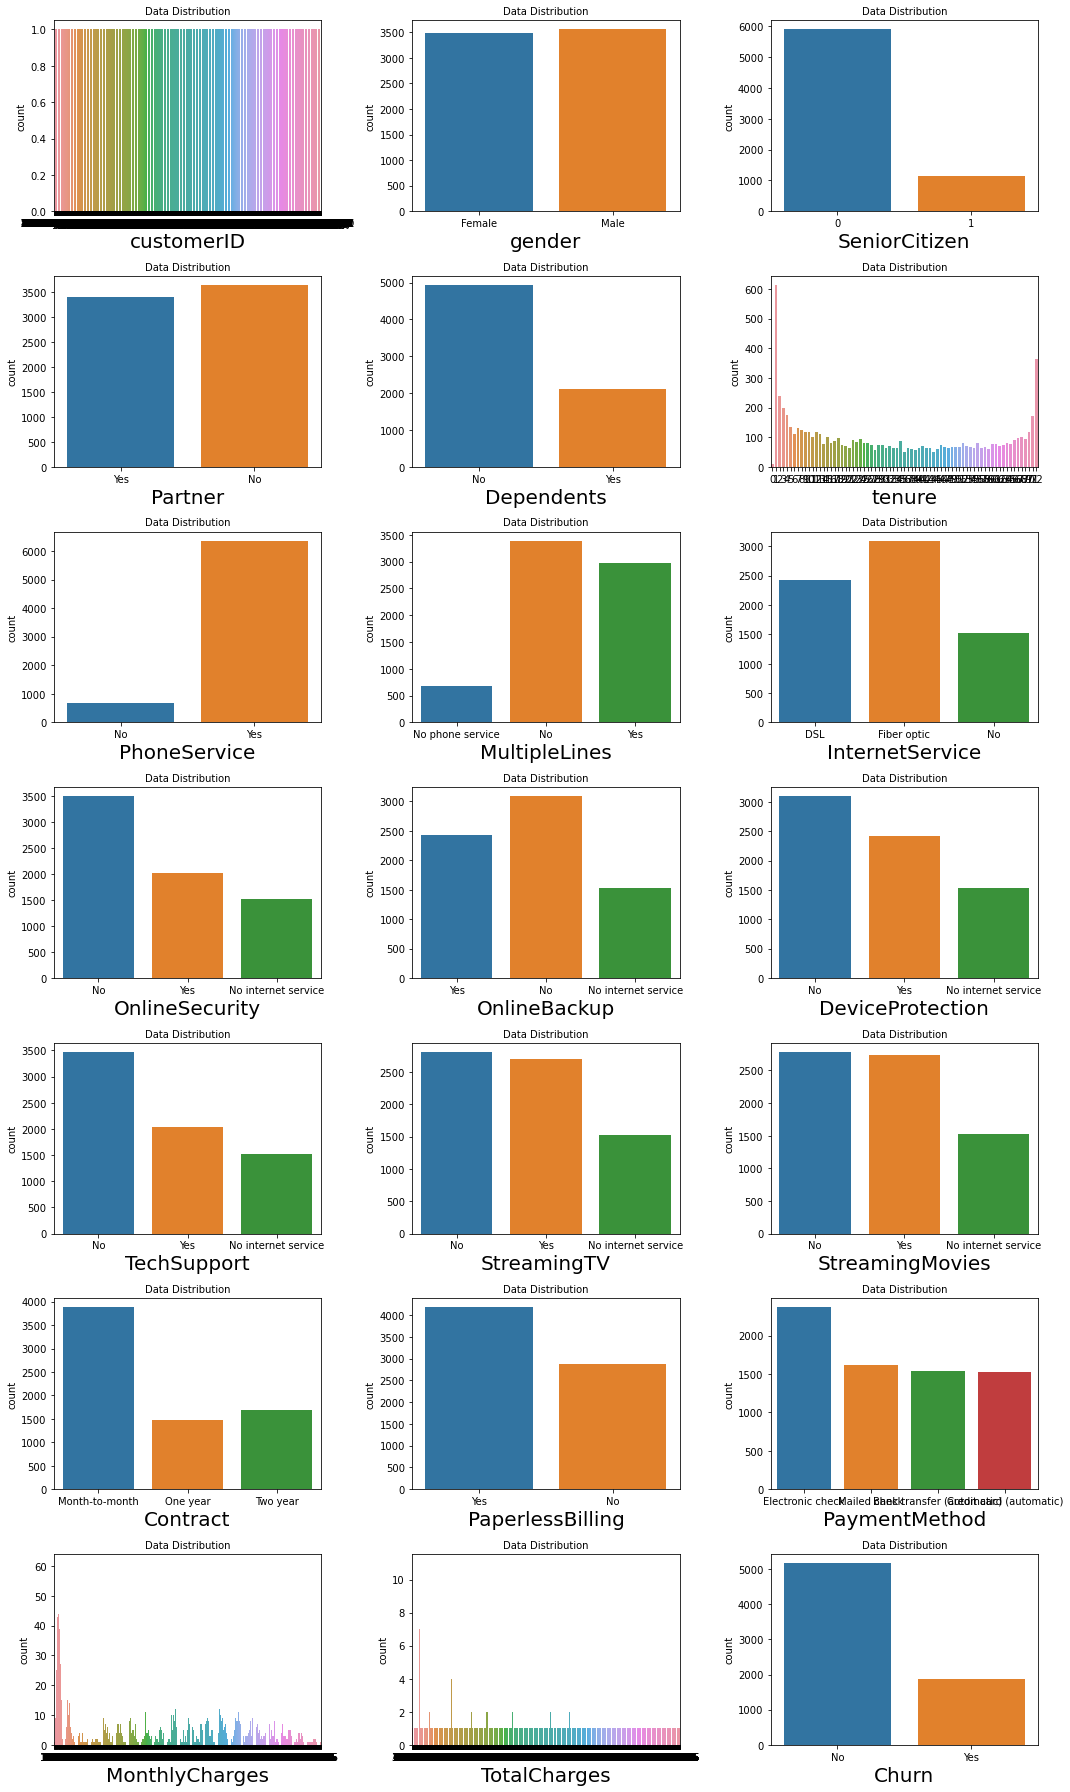

In [8]:
#Plotting count plot to check and see the values and categories of each feature
plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=21:
        ax = plt.subplot(7,3,plotnumber)
        sns.countplot(x = data[column])
        plt.xlabel(column, fontsize = 20)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

**With this we can see which features has how many values and number of categories under each of the them**

In [5]:
#lets drop the column customer id as it will hardly have any impact on our model.

data.drop(['customerID'], axis =1, inplace = True)

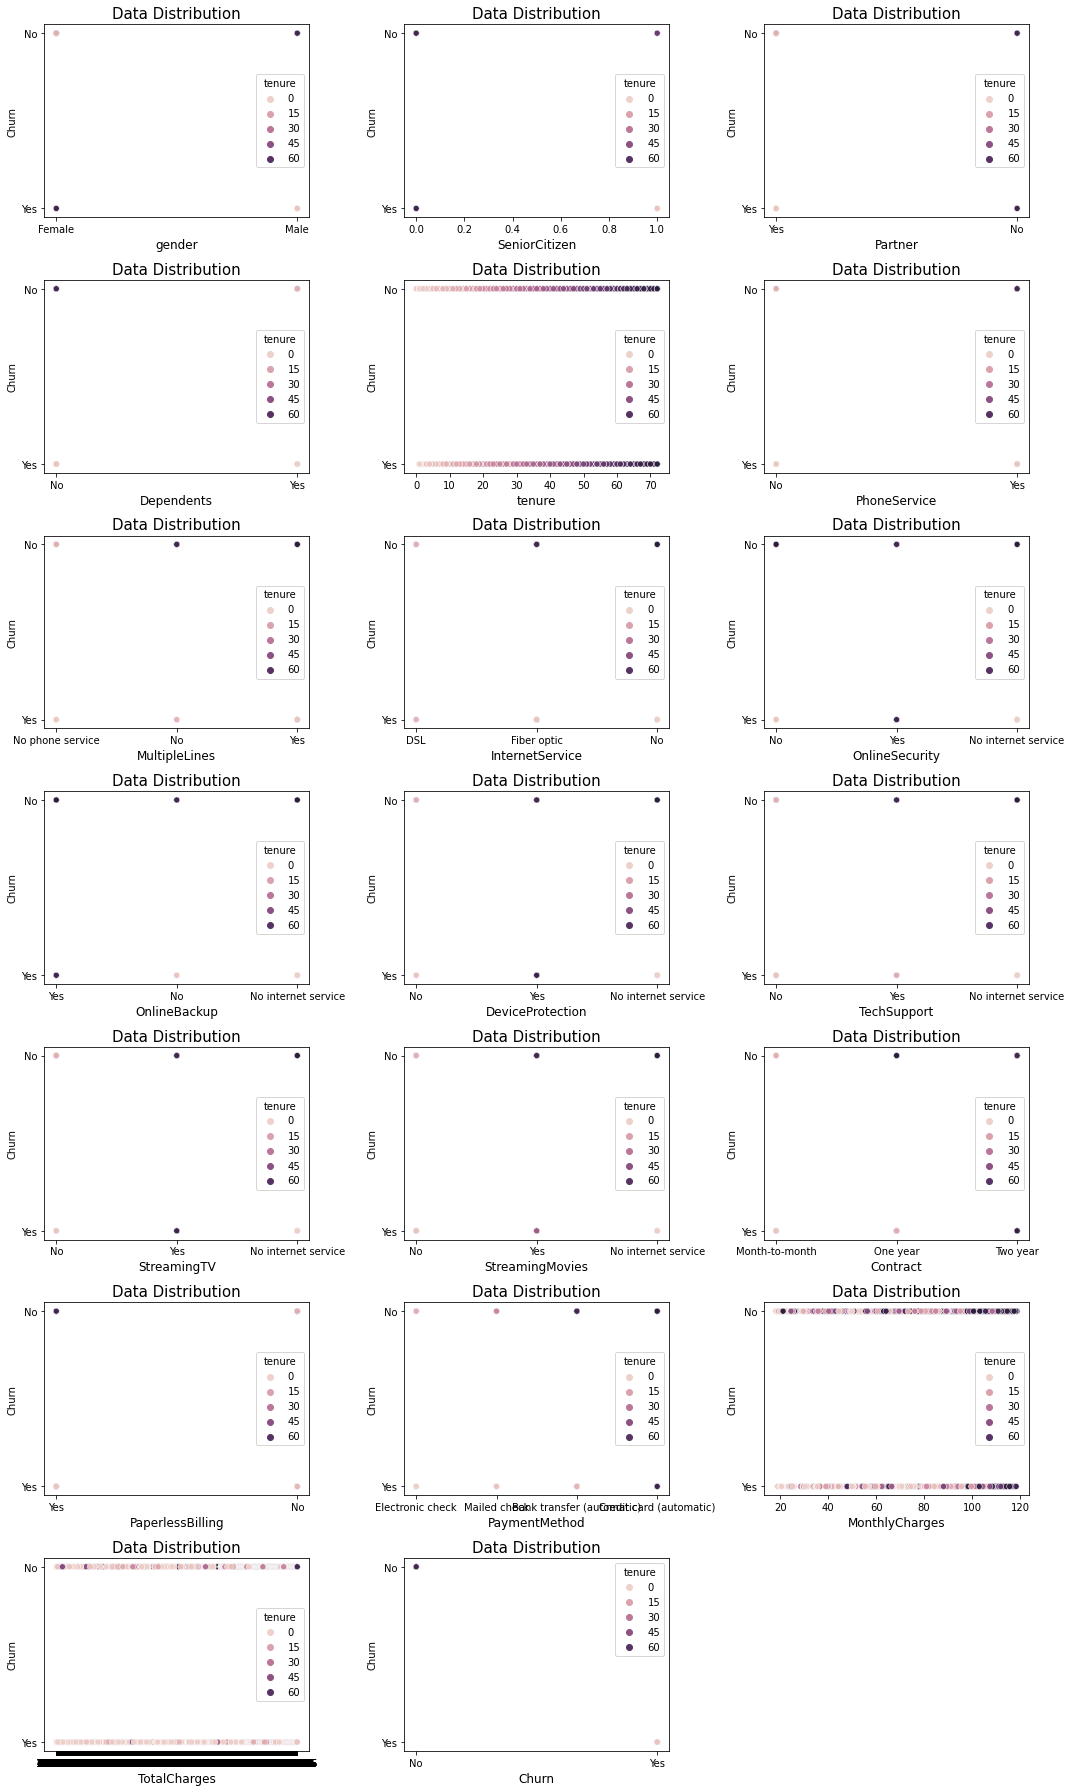

In [37]:
#Lets now plot scatter plot for each column in x with respect to y to understand the data.

plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=21:
        ax = plt.subplot(7,3,plotnumber)
        sns.scatterplot(x = data[column], y= data['Churn'],hue=data['tenure'],legend="auto")
        plt.xlabel(column, fontsize = 12)
        plt.title("Data Distribution", fontsize = 15,)
    plotnumber += 1
plt.tight_layout()

**From this we see that mostly the data is distributed evenly for each and the most tenured ones are the ones who preferred to stay**

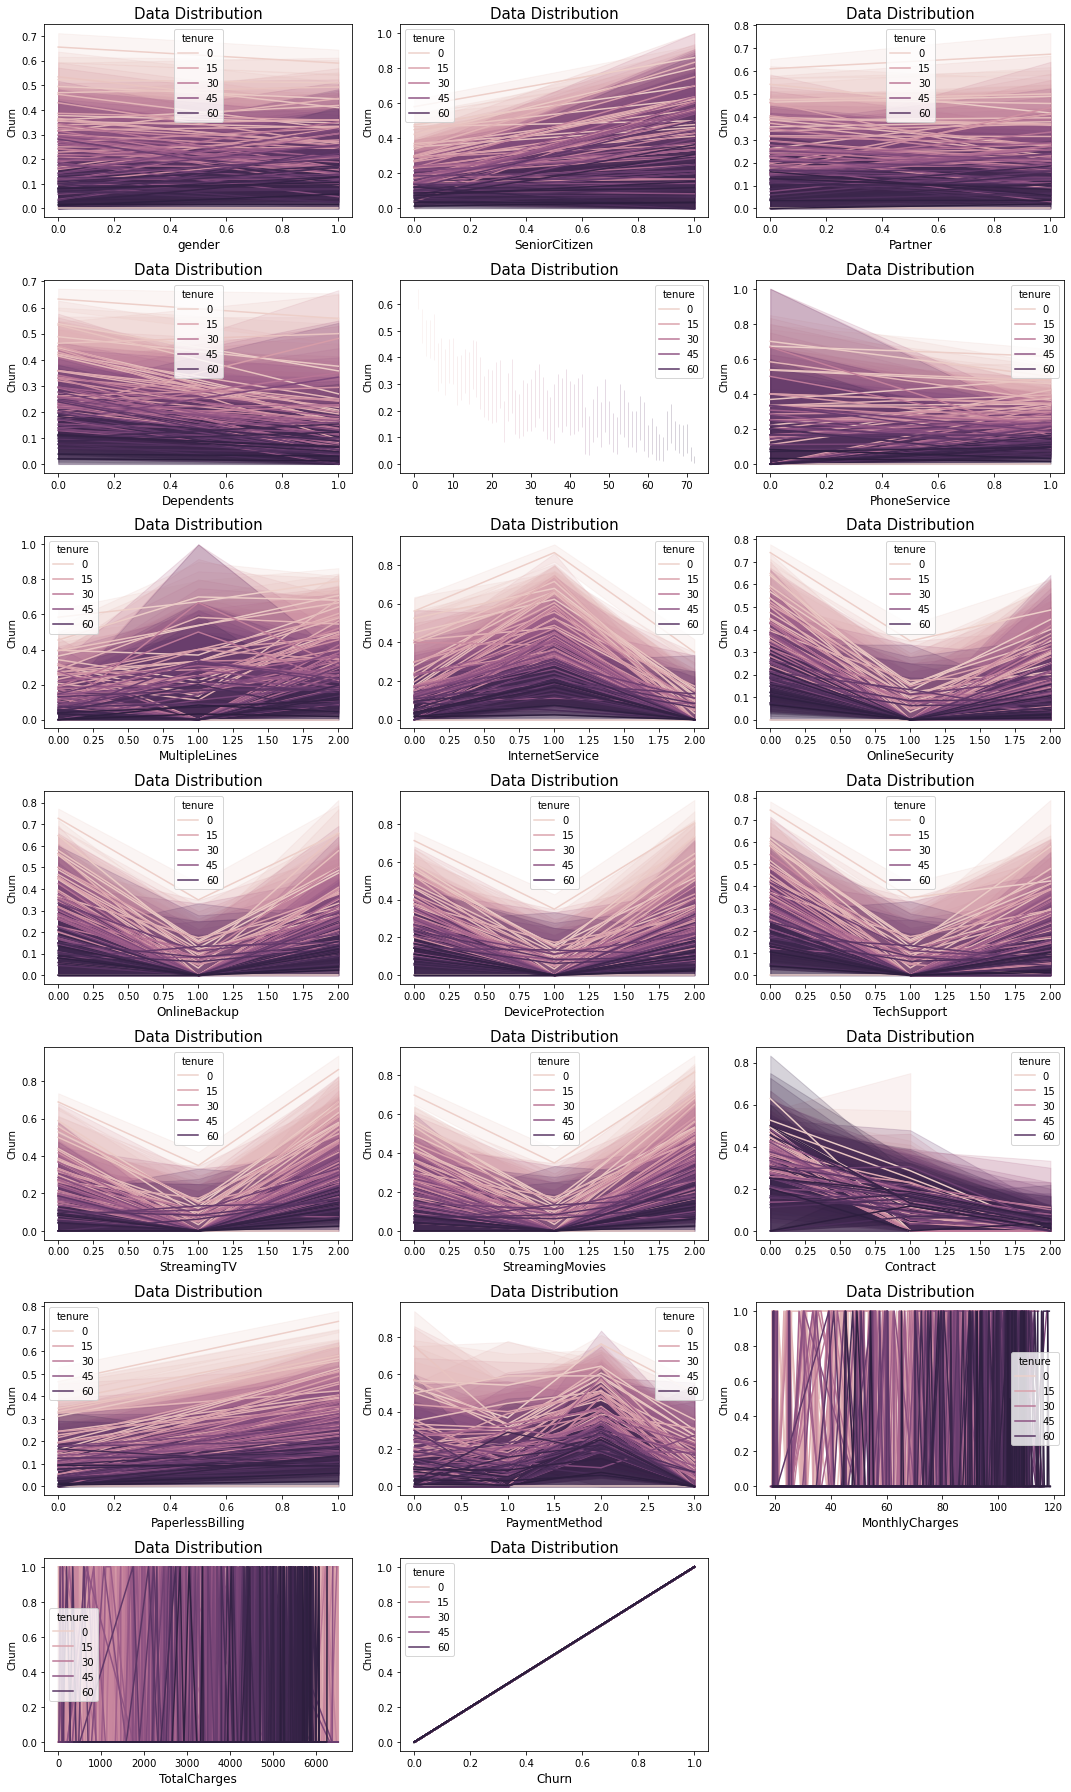

In [44]:
plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=21:
        ax = plt.subplot(7,3,plotnumber)
        sns.lineplot(x = data[column], y= data['Churn'],hue=data['tenure'],legend="auto")
        plt.xlabel(column, fontsize = 12)
        plt.title("Data Distribution", fontsize = 15,)
    plotnumber += 1
plt.tight_layout()

In [42]:
#lets see the Standard Deviation, Min Value, 25 % , 75% and maximum value of the colums

data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


We see the mean, standard deviation and 1st, 2nd and 3rd quartile with it.

In [8]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i] = LE.fit_transform(data[i].values.reshape(-1,1))

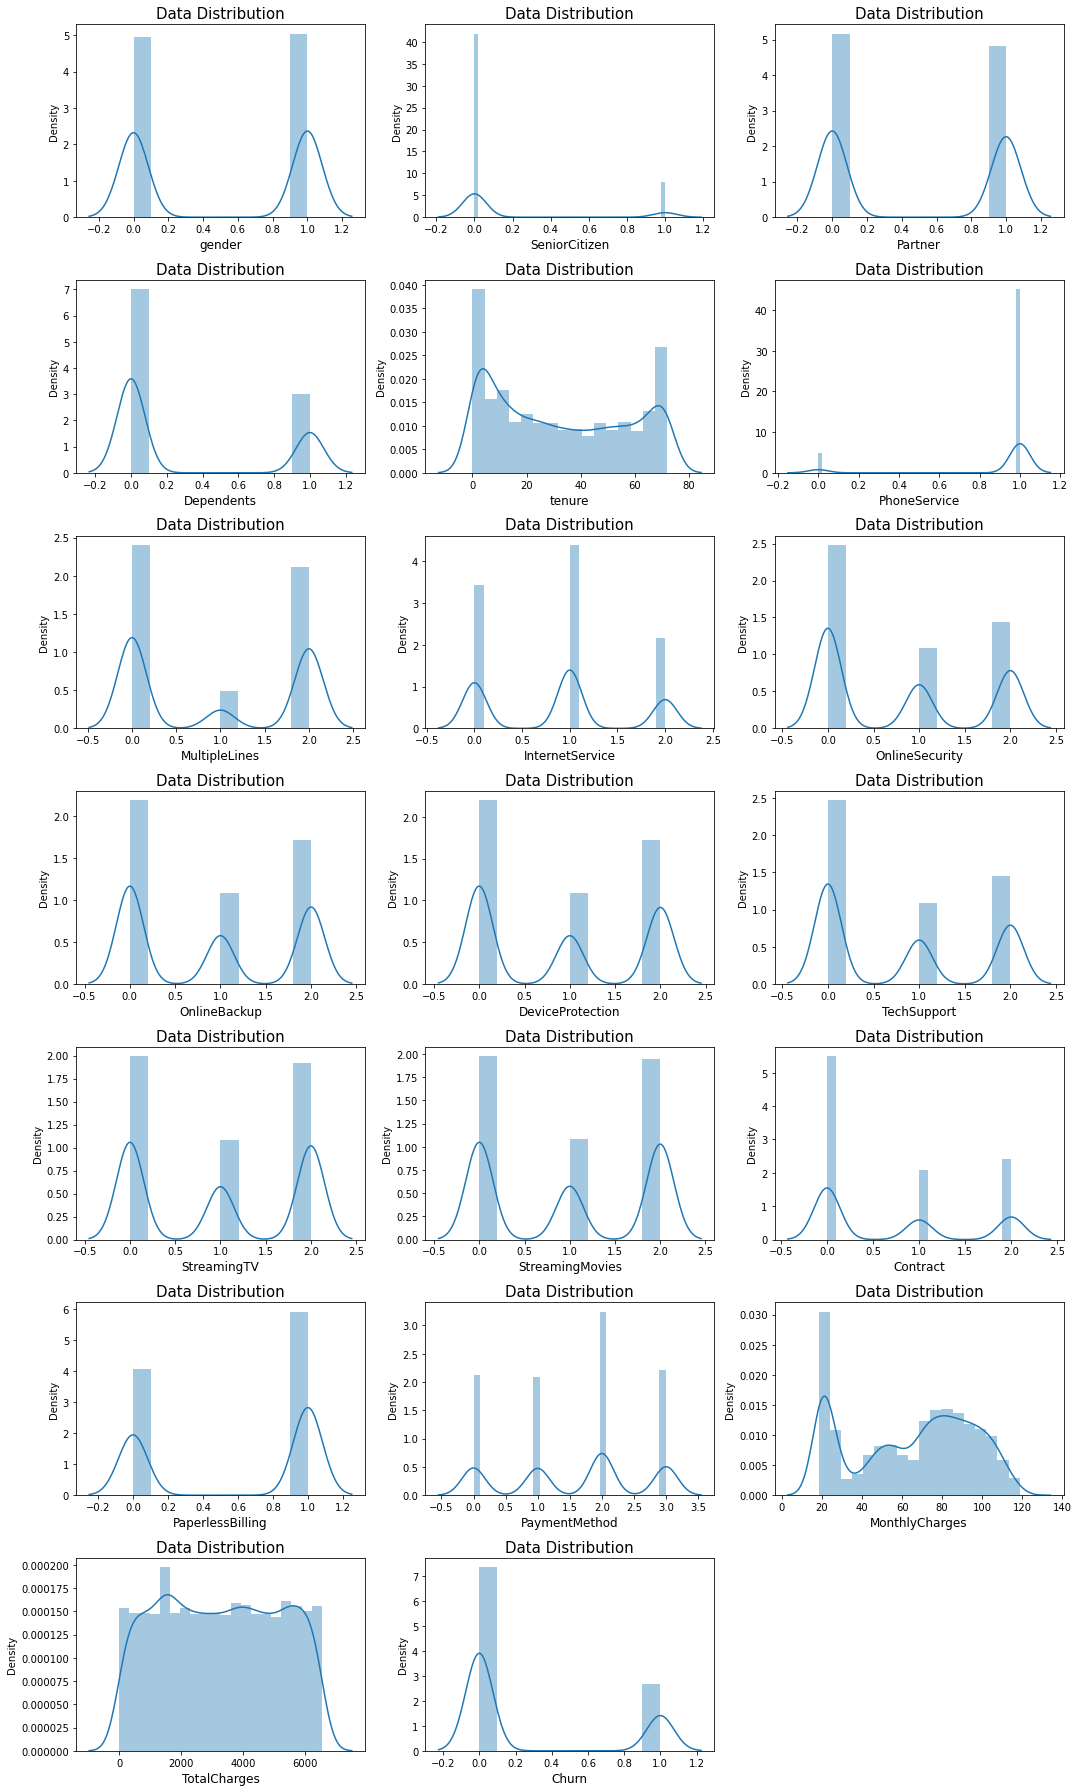

In [9]:
#Now with the help of distplot lets check for skewness in the dataset.
plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=21:
        ax = plt.subplot(7,3,plotnumber)
        sns.distplot(x = data[column])
        plt.xlabel(column, fontsize = 12)
        plt.title("Data Distribution", fontsize = 15,)
    plotnumber += 1
plt.tight_layout()

In [43]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

**This shows that there is no skewness in the dataset**

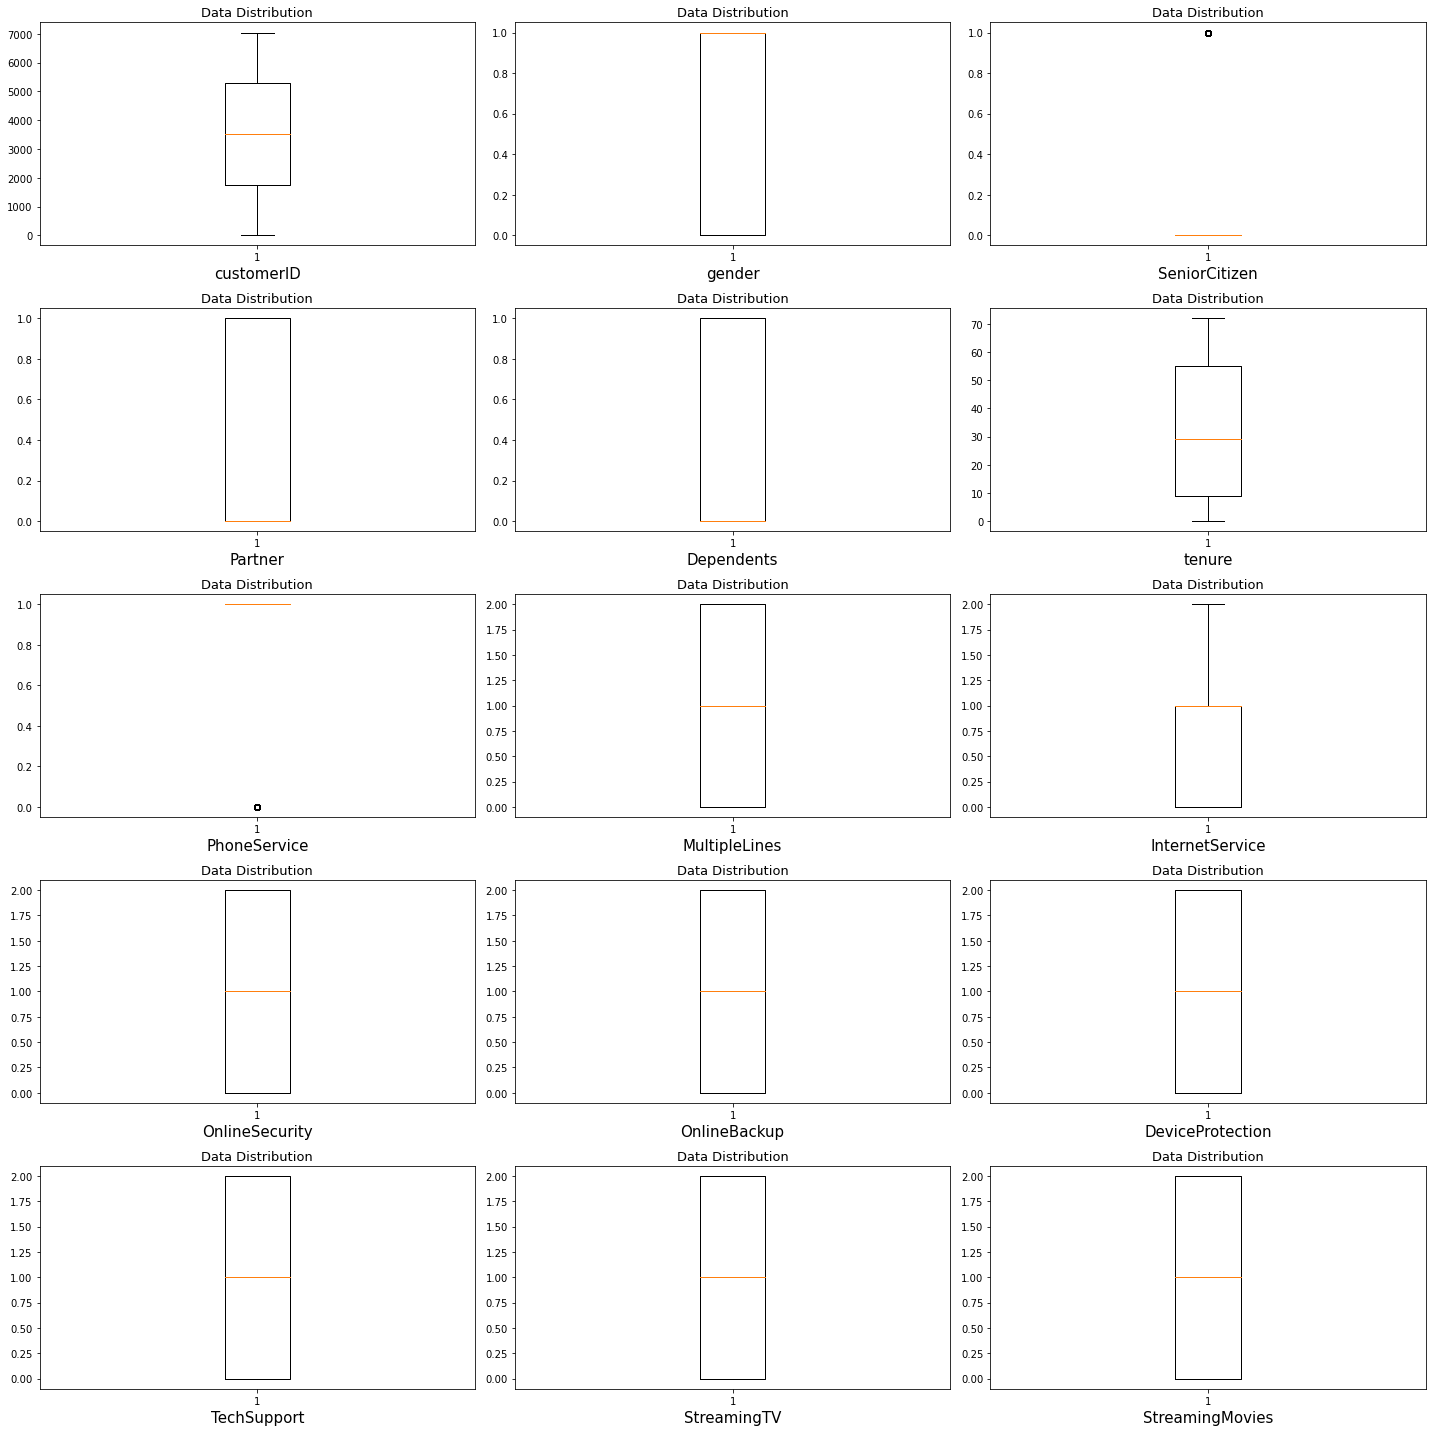

In [9]:
#Checking for outliers

plt.figure(figsize = [20,20])
plotnumber = 1

for column in data:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber += 1
plt.tight_layout()

**With it we can see there is not much outliers in the dataset**

In [12]:
#Now will check the collinearity among features
corr_mat = data.corr()
corr_mat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


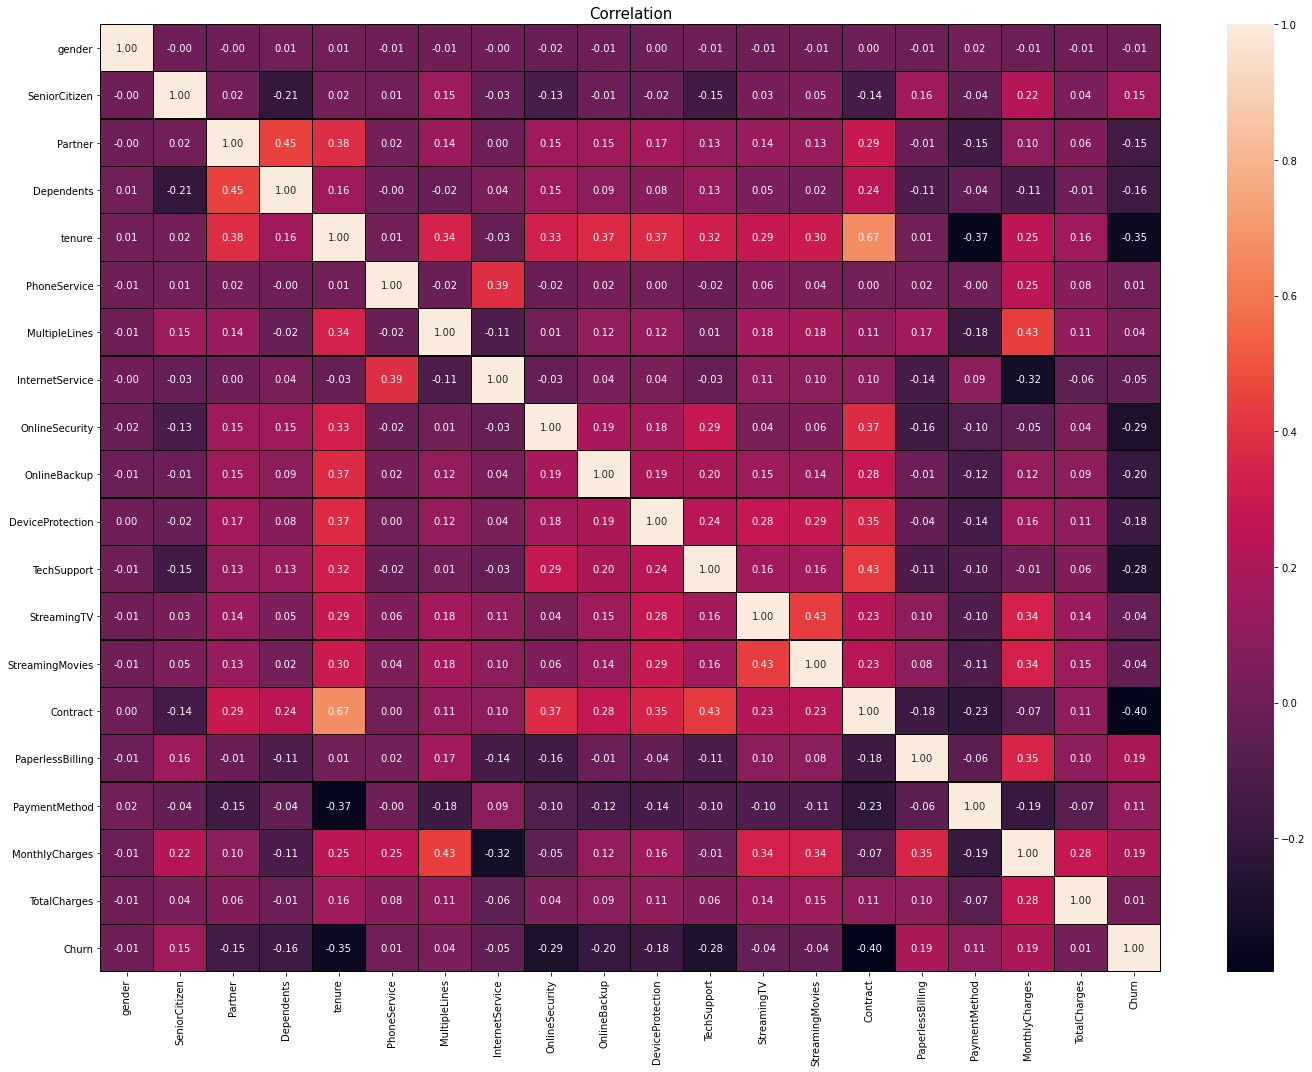

In [13]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

#### Observation from the above plot.

Max Correlation of the output with the features columns is PaperlessBilling and MonthlyCharges.

Min Correlation of the output with the features columns is with Contract.

Also we can see that there are not much corelation among the features.

### Data Cleaning :

**Removing Outliers**

In [10]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[1.00955867 0.43991649 1.03453023 ... 1.16032292 0.39860759 0.60102348]
 [0.99053183 0.43991649 0.96662231 ... 0.25962894 0.94876238 0.60102348]
 [0.99053183 0.43991649 0.96662231 ... 0.36266036 1.64188328 1.66382851]
 ...
 [1.00955867 0.43991649 1.03453023 ... 1.1686319  0.13968008 0.60102348]
 [0.99053183 2.27315869 1.03453023 ... 0.32033821 0.31653445 1.66382851]
 [0.99053183 0.43991649 0.96662231 ... 1.35896134 1.13801338 0.60102348]]

 Row Numbers ==> [   0    3    7   20   27   62   81   89  103  105  107  114  116  129
  131  133  168  180  185  187  206  211  215  216  217  225  236  252
  255  259  260  263  272  278  303  321  324  328  348  354  358  372
  376  382  387  398  424  431  435  452  465  481  488  495  498  544
  569  596  610  616  620  634  660  667  669  674  677  688  716  718
  735  765  776  784  790  794  813  829  843  847  859  866  873  875
  877  884  893  917  934  941  943  960  973 1011 1018 1037 1050 1051
 1053 1072 1110 1119 1122 1144 1146 1150 

In [11]:
##Storing the zcore > 3 in index

index = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

New_df = data.drop(data.index[index])

In [12]:
#Separating label and features

x = New_df.drop(['Churn'], axis = 1)
y = New_df['Churn']

### Model Building:

In [13]:
#Data is now cleaned, skewness and outliers removed. We will now build the model.

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
#Splitting the data into train and test

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 1000, stratify = y)

In [21]:
#Model Building

In [22]:
##Lets see which model will give the best output

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [24]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [25]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [26]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
svc.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [27]:
#Lets check the roc_auc_score
#for Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.7246937745938855

In [28]:
#for Decision Tree
roc_auc_score(y_test,dt.predict(x_test))

0.6651215820805165

In [29]:
#for Random Forest
roc_auc_score(y_test,rf.predict(x_test))

0.6979537887196045

In [30]:
#for KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.6807789324992433

In [31]:
#For support vectore classifier
roc_auc_score(y_test,svc.predict(x_test))

0.6893007769145394

In [32]:
#Now plotting roc_auc_curve for all the columns

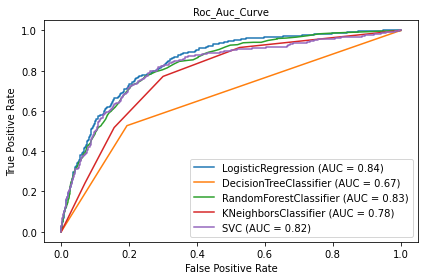

In [33]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(kn,x_test,y_test,ax=curve.ax_)

plot_roc_curve(svc,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

With above plotting we can see area covered by Logistic Regression Model is the most hence he will chose it further.

**Getting all the other scores for Logistic Regression**

In [35]:
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(x_test)

In [37]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8057825267127593

In [38]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1048,  118],
       [ 191,  234]], dtype=int64)

In [39]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.7246937745938855

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1166
           1       0.66      0.55      0.60       425

    accuracy                           0.81      1591
   macro avg       0.76      0.72      0.74      1591
weighted avg       0.80      0.81      0.80      1591



**Cross Validation**

In [42]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(lr,x,y,cv=5)

cvs.mean()

0.7973576753768398

Since the accuracy score and cross validation score are almost same we can say that the model is neither overfitting or underfitting

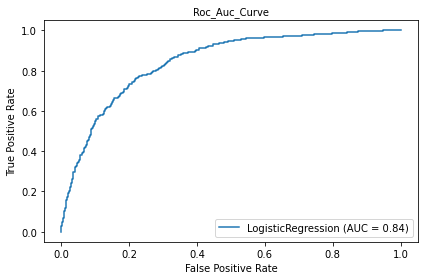

In [44]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(lr,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### HyperParameter Tuning:

In [45]:
from sklearn.model_selection import GridSearchCV

In [75]:
params = {'C':[2.0,5.0,6.0],
          'penalty':['l1', 'l2','elasticnet'],
          'random_state':[100,500,600],
          'solver': ['newton-cg','saga'],
          'max_iter':[100,500,600]}

In [76]:
grid = GridSearchCV(lr, param_grid= params, cv = 5, n_jobs=-1)

In [77]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [2.0, 5.0, 6.0], 'max_iter': [100, 500, 600],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [100, 500, 600],
                         'solver': ['newton-cg', 'saga']})

In [78]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'C': 2.0, 'max_iter': 100, 'penalty': 'l1', 'random_state': 100, 'solver': 'saga'}


In [61]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [62]:
clf.fit(x_train, y_train)

LogisticRegression(C=2.0, penalty='l1', random_state=100, solver='saga')

In [63]:
y_pred =  clf.predict(x_test)

In [64]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8057825267127593

In [65]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1048,  118],
       [ 191,  234]], dtype=int64)

In [66]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.7246937745938855

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1166
           1       0.66      0.55      0.60       425

    accuracy                           0.81      1591
   macro avg       0.76      0.72      0.74      1591
weighted avg       0.80      0.81      0.80      1591



In [68]:
##Cross Validating.

cvs = cross_val_score(clf,x,y,cv=5)

cvs.mean()

0.780537481411216

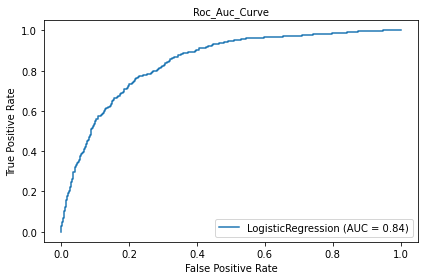

In [69]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### Model Saving :

In [70]:
#Saving the model

import joblib

filename = 'Customer Churn.sav'
joblib.dump(clf, filename)

['Customer Churn.sav']